Practice NLP Course 1 Learning on Dataset Fake News  (TFIDF & Naive Bayes)

#### Link for refrence 
https://www.kaggle.com/pranavb01/fake-news-tfidf-naive-bayes

### Importing the Important Libarries

In [12]:
%matplotlib inline 
import pandas as pd
import numpy as np
import nltk as nltk
import re
nltk.download('punkt')
from nltk.tokenize import word_tokenize 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from matplotlib import pyplot as plt 

[nltk_data] Downloading package punkt to C:\Users\Garvit
[nltk_data]     Anand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
df  = pd.read_csv(r'C:\Users\Garvit Anand\Desktop\Machine Learning\ML_Complete\ML_DC\NLP\Course_1\fake_or_real_news.csv')
print("Data Head")
print()
print()
print(df.head())

Data Head


   Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL  


In [15]:
print("Data information")
print()
print()
print(df.info())

Data information


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
None


In [16]:
title_column  =  df['title']
print(title_column[0])

You Can Smell Hillary’s Fear


In [17]:
text_column =  df['text']
print(text_column[0])

Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. 
But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. 
The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. 
The FBI’s leadership is being warned that the entire left

### Performing tokenization on very first news 

In [18]:

news_0  =  word_tokenize(text_column[0])
print(news_0)

['Daniel', 'Greenfield', ',', 'a', 'Shillman', 'Journalism', 'Fellow', 'at', 'the', 'Freedom', 'Center', ',', 'is', 'a', 'New', 'York', 'writer', 'focusing', 'on', 'radical', 'Islam', '.', 'In', 'the', 'final', 'stretch', 'of', 'the', 'election', ',', 'Hillary', 'Rodham', 'Clinton', 'has', 'gone', 'to', 'war', 'with', 'the', 'FBI', '.', 'The', 'word', '“', 'unprecedented', '”', 'has', 'been', 'thrown', 'around', 'so', 'often', 'this', 'election', 'that', 'it', 'ought', 'to', 'be', 'retired', '.', 'But', 'it', '’', 's', 'still', 'unprecedented', 'for', 'the', 'nominee', 'of', 'a', 'major', 'political', 'party', 'to', 'go', 'war', 'with', 'the', 'FBI', '.', 'But', 'that', '’', 's', 'exactly', 'what', 'Hillary', 'and', 'her', 'people', 'have', 'done', '.', 'Coma', 'patients', 'just', 'waking', 'up', 'now', 'and', 'watching', 'an', 'hour', 'of', 'CNN', 'from', 'their', 'hospital', 'beds', 'would', 'assume', 'that', 'FBI', 'Director', 'James', 'Comey', 'is', 'Hillary', '’', 's', 'opponent',

### unique Tokens 

In [19]:
unique_tokens_news_0 = set( word_tokenize(text_column[0]))
print(unique_tokens_news_0)

{'war', 'also', 'weathered', 'tied', 'do', 'anywhere', '.', 'Ryan', 'existence', 'by', 'ahead', 'New', 'Democrats', 'lash', 'kind', 'Pretending', 'email', 'would', 'server', 'pure', 'without', 'might', 'bathroom', 'struggle', 'desperate', 'original', 'During', 'energy', 'changed', 'Carville', 'Foundation', 'If', 'presidential', '%', 'gone', 'may', 'Weiner', 'paranoid', 'retired', 'shown', 'senior', 'wiretaps', 'There', 'then', 'campaign', 'emails', 'back', 'lived', 'spinmeisters', 'go', 'in', 'if', 'right', 'a', 'Clintons', 'breathing', 'establishment', 'and', '60', 'focusing', 'meant', 'damaging', 'react', 'did', 'short', 'act', 'risk', 'investigators', 'front', 'threat', 'done', 'news', 'smoke', 'appearance', 'being', 'protecting', 'accused', 'exposed', 'place', 'unfavorable', 'Countless', 'illegality', 'country', 'wouldn', 'decides', 'years', 'beds', 'surprising', 'born', 'ride', 'Within', 'survival', 'wing', 'really', 'intimidation', 'head', 'pass', 'time', 'Center', 'insane', 'cou

[3, 4, 9, 4, 2, 8, 1, 4, 9, 2, 5, 3, 9, 4, 4, 10, 5, 5, 6, 4, 7, 5, 8, 8, 9, 8, 6, 6, 7, 8, 10, 2, 12, 1, 4, 3, 6, 8, 7, 5, 6, 8, 5, 4, 8, 6, 4, 5, 12, 2, 2, 2, 5, 1, 8, 9, 13, 3, 2, 8, 5, 8, 5, 3, 5, 3, 4, 13, 5, 6, 4, 4, 5, 10, 5, 10, 7, 7, 5, 11, 9, 10, 7, 6, 7, 5, 4, 10, 4, 4, 6, 8, 4, 6, 12, 4, 4, 4, 6, 6, 9, 5, 7, 9, 6, 5, 6, 11, 4, 7, 6, 4, 1, 3, 1, 8, 9, 4, 5, 2, 4, 7, 8, 5, 7, 3, 7, 2, 9, 4, 6, 4, 10, 5, 6, 5, 2, 5, 5, 6, 8, 9, 8, 6, 8, 10, 7, 7, 12, 8, 7, 9, 10, 10, 3, 6, 6, 5, 9, 5, 5, 5, 3, 10, 8, 11, 4, 2, 11, 3, 8, 5, 4, 10, 3, 5, 4, 4, 8, 5, 8, 7, 11, 5, 5, 6, 5, 3, 7, 3, 6, 5, 5, 7, 6, 6, 3, 12, 7, 11, 13, 8, 3, 3, 8, 3, 4, 4, 8, 7, 4, 8, 4, 9, 4, 4, 10, 4, 5, 5, 3, 2, 6, 5, 3, 9, 8, 7, 9, 4, 7, 8, 6, 6, 6, 11, 4, 8, 8, 5, 3, 9, 11, 8, 5, 3, 5, 8, 5, 5, 7, 7, 7, 3, 5, 5, 8, 11, 9, 4, 7, 6, 3, 5, 9, 2, 5, 2, 10, 9, 4, 8, 9, 6, 6, 2, 8, 6, 3, 7, 9, 8, 13, 4, 7, 4, 2, 1, 4, 8, 4, 4, 4, 3, 4, 7, 4, 5, 7, 5, 5, 6, 2, 10, 1, 8, 2, 3, 5, 3, 8, 8, 6, 6, 3, 4, 3, 3, 9, 5, 10, 7,

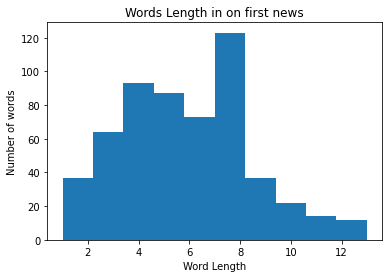

In [20]:
from matplotlib import pyplot as plt 
from nltk.tokenize import word_tokenize
word_lengths =  [len(w) for w in unique_tokens_news_0]
print(word_lengths)
plt.hist(word_lengths)
plt.title("Words Length in on first news")
plt.xlabel("Word Length")
plt.ylabel("Number of words")
plt.show()

### Removing stop words from first_news 


In [21]:
text = text_column[0]
print("Text")
print(text)
print()
print()
tokens =  [w for w in word_tokenize(text.lower()) if w.isalpha()]



Text
Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. 
In the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. 
The word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. 
But that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. 
The FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. 
The FBI’s leadership is being warned that the entire

In [23]:
import nltk
nltk.download('stopwords')
no_stops =  [t for t in tokens if t not in stopwords.words('english')]
print(no_stops)

[nltk_data] Downloading package stopwords to C:\Users\Garvit
[nltk_data]     Anand\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['daniel', 'greenfield', 'shillman', 'journalism', 'fellow', 'freedom', 'center', 'new', 'york', 'writer', 'focusing', 'radical', 'islam', 'final', 'stretch', 'election', 'hillary', 'rodham', 'clinton', 'gone', 'war', 'fbi', 'word', 'unprecedented', 'thrown', 'around', 'often', 'election', 'ought', 'retired', 'still', 'unprecedented', 'nominee', 'major', 'political', 'party', 'go', 'war', 'fbi', 'exactly', 'hillary', 'people', 'done', 'coma', 'patients', 'waking', 'watching', 'hour', 'cnn', 'hospital', 'beds', 'would', 'assume', 'fbi', 'director', 'james', 'comey', 'hillary', 'opponent', 'election', 'fbi', 'attack', 'everyone', 'obama', 'cnn', 'hillary', 'people', 'circulated', 'letter', 'attacking', 'comey', 'currently', 'media', 'hit', 'pieces', 'lambasting', 'targeting', 'trump', 'surprising', 'clintons', 'allies', 'start', 'running', 'attack', 'ads', 'fbi', 'fbi', 'leadership', 'warned', 'entire', 'establishment', 'form', 'lynch', 'mob', 'continue', 'going', 'hillary', 'fbi', 'cred

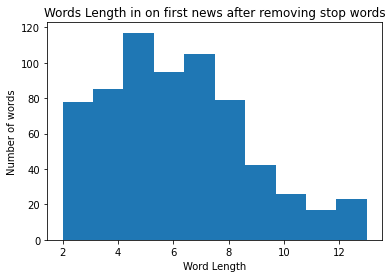

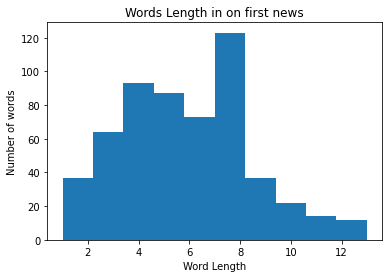

In [24]:
word_lengths =  [len(w) for w in no_stops]
plt.hist(word_lengths)
plt.title("Words Length in on first news after removing stop words")
plt.xlabel("Word Length")
plt.ylabel("Number of words")
plt.show()

word_lengths_old =  [len(w) for w in unique_tokens_news_0]
plt.hist(word_lengths_old)
plt.title("Words Length in on first news")
plt.xlabel("Word Length")
plt.ylabel("Number of words")
plt.show()

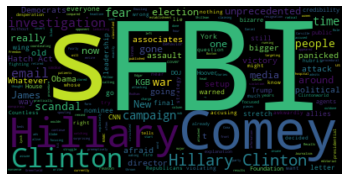

In [25]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
# Start with one review:
text = text_column[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

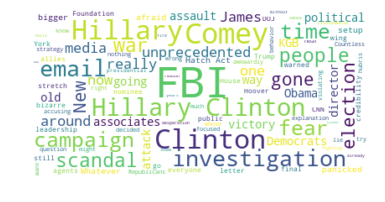

In [24]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()
# Save the image in the img folder:
#wordcloud.to_file("img/first_review.png")